In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import queue
import random
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def Generar_Tablero(n):
    tablero = np.zeros(shape=(n,n)).astype(int)
    ## Ganar
    tablero[0,0::1] = 1
    tablero[n - 1,0::1] = 2
    ## Jugadores
    pos1 = random.randint(0,n - 1)
    pos2 = random.randint(0,n - 1)
    tablero[0, pos1] = 3
    tablero[n - 1, pos2] = 4
    #OBSTACULOS
    i = 1
    j = n - 1
    for i in range(1, j):
      tablero[i, random.randint(0,n - 1)] = 5
    return tablero

In [3]:
def dibujarTablero(matriz, id=True):
  plt.figure(figsize=(np.size(matriz,0),np.size(matriz,1)))
  sns.heatmap(matriz, linewidths=.1, linecolor='white', annot=False, cmap='magma', yticklabels=False, xticklabels=False, cbar=False, square=True);
  sns.heatmap(matriz, linewidths=.1, linecolor='white', annot=id, cmap='magma', yticklabels=False, xticklabels=False, cbar=False, square=True,
  mask=np.array(matriz)<0);
  plt.show()

In [4]:
def Pinta_Camino(matriz, path = ""):
    for x, pos in enumerate(matriz[0]):
        if pos == 3:
            start = x

    i = start
    j = 0
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(matriz):
        for i, col in enumerate(row):
            if (j, i) in pos:
              matriz[j, i] = 3
        print()

In [5]:
def valid(matriz, moves):
    for x, pos in enumerate(matriz[0]):
        if pos == 3:
            start = x

    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(matriz[0]) and 0 <= j < len(matriz)):
            return False
        elif (matriz[j][i] == 5):
            return False
        elif (matriz[j][i] == 4):
            return False
    return True

In [6]:
def findEnd(matriz, moves):
    for x, pos in enumerate(matriz[0]):
        if pos == 3:
          start = x
    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if matriz[j][i] == 2:
        print("Found: " + moves)
        Pinta_Camino(matriz, moves)
        return True

    return False

In [7]:
def Pinta_Camino_jugador_segundo(matriz,n, path = ""):
    for x, pos in enumerate(matriz[n-1]):
        if pos == 4:
            start = x

    i = start
    j = n - 1
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(matriz):
        for i, col in enumerate(row):
            if (j, i) in pos:
              matriz[j, i] = 4
        print()

In [8]:
def valid_jugador_segundo(matriz,n, moves):
    for x, pos in enumerate(matriz[n-1]):
        if pos == 4:
            start = x

    i = start
    j = n - 1
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(matriz[0]) and 0 <= j < len(matriz)):
            return False
        elif (matriz[j][i] == 5):
            return False
        elif (matriz[j][i] == 3):
            return False    

    return True

In [9]:
def findEnd_segundo_jugador(matriz,n, moves):
    for x, pos in enumerate(matriz[n-1]):
        if pos == 4:
          start = x
    i = start
    j = n - 1
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if matriz[j][i] == 1:
        print("Found: " + moves)
        Pinta_Camino_jugador_segundo(matriz,n, moves)
        return True

    return False

In [10]:
def mesure_time(main,n):
  start=time.time()
  main(n)
  end=time.time()
  return end-start

In [11]:
def main(n):
  matriz = Generar_Tablero(n)

  #-----------Primer Peon
  nums = queue.Queue()
  nums.put("")
  add = ""

  while not findEnd(matriz, add): 
      add = nums.get()
      for j in ["L", "R", "U", "D"]:
          put = add + j
          if valid(matriz, put):
              nums.put(put)

  #----------Segundo Peon

  nums = queue.Queue()
  nums.put("")
  agregar = ""

  while not findEnd_segundo_jugador(matriz,n, agregar): 
      agregar = nums.get()
      for j in ["L", "R", "U", "D"]:
          put = agregar + j
          if valid_jugador_segundo(matriz,n, put):
              nums.put(put)

  dibujarTablero(matriz)

Found: LDDDDDDDD









Found: RUURUUUUUU











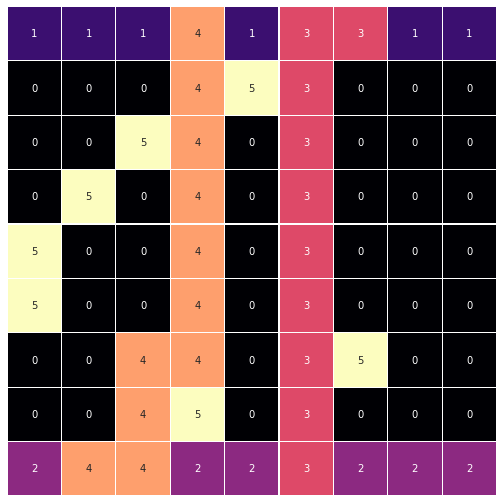

El tiempo es  10.62555456161499


In [13]:
print("El tiempo es ",mesure_time(main,9))